# 시험문제


## 1.환경준비

### 1) 라이브러리 로딩

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

### 2) 데이터 로딩

In [2]:
data = pd.read_csv('https://bit.ly/3QvfQ3W')
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No


### 3) 필요한 함수 생성

In [3]:
# 변수 중요도 plot
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df

## 2.데이터 준비


In [4]:
target = 'Sales'
x = data.drop(target, axis = 1)
y = data.loc[:,target]

col_cat = ['ShelveLoc','US','Urban', 'Education']
x = pd.get_dummies(x, columns = col_cat, drop_first = True)

x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = .2, random_state = 2022)

scaler = MinMaxScaler()
x_train_s = scaler.fit_transform(x_train)
x_val_s = scaler.transform(x_val)

## 3.시험문제

* 1) random forest 알고리즘을 이용하여 다음의 조건으로 모델을 생성하고, 변수 중요도를 확인하시오. 모델에서 가장 중요한 변수는?
    * 모델링 조건 : random_state = 2022, 다른 하이퍼파라미터는 모두 default로 두고 모델링

In [6]:
rf = RandomForestRegressor(random_state=2022)
rf.fit(x_train, y_train)

RandomForestRegressor(random_state=2022)

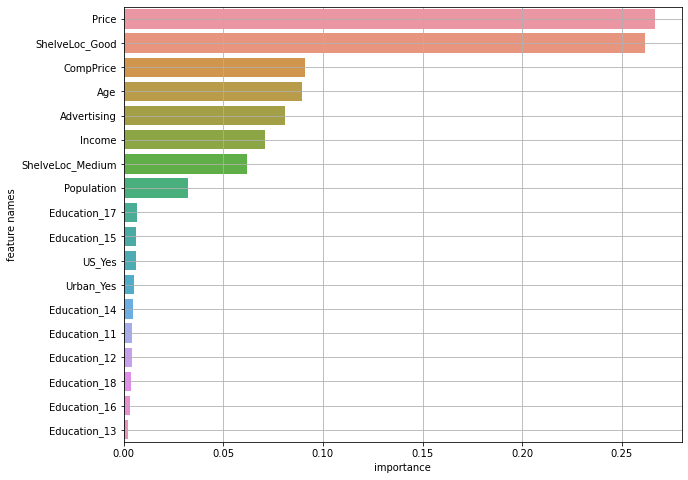

In [7]:
result = plot_feature_importance(rf.feature_importances_, list(x_train))

* 2) KNN 알고리즘을 이용하여 다음의 조건으로 모델을 생성하고, 변수 중요도를 확인하시오. 모델에서 가장 중요한 변수는?
    * 모델링 조건 : 하이퍼파라미터는 모두 default로 두고 모델링
    * 변수 중요도는 PFI로 계산하시오.
        * 변수 중요도 계산시, validation set 이용
        * 반복횟수 10번
        * random_state=2022
        * 다른 옵션은 default
    * 평균 중요도로 계산하기

In [13]:
knn = KNeighborsRegressor()
knn.fit(x_train_s, y_train)

KNeighborsRegressor()

In [14]:
pfi1 = permutation_importance(knn, x_val_s, y_val, n_repeats=10, random_state=2022)

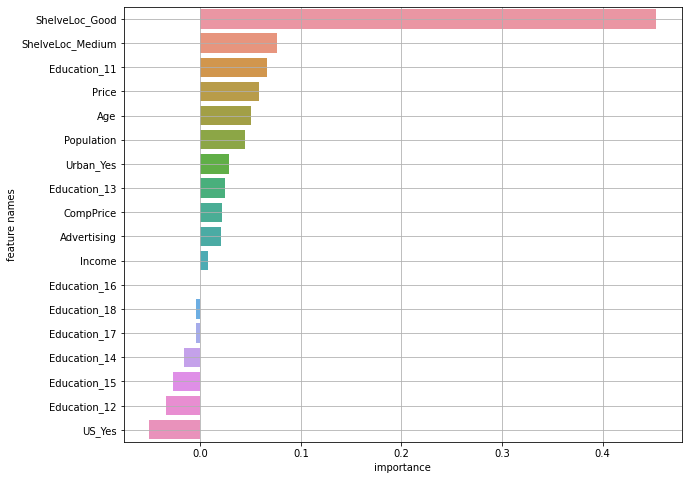

In [15]:
result = plot_feature_importance(pfi1.importances_mean, list(x_val))

* 3) XGBoost 알고리즘을 이용하여 다음의 조건으로 모델을 생성하고, 변수 중요도를 확인하시오. 모델에서 두번째로 중요한 변수는?
    * 모델링 조건 : random_state = 2022, 다른 하이퍼파라미터는 모두 default로 두고 모델링

* 4) SVM 알고리즘을 이용하여 다음의 조건으로 모델을 생성하고, 변수 중요도를 확인하시오. 모델에서 두번째로 중요한 변수는?
    * 모델링 조건 : 하이퍼파라미터는 모두 default로 두고 모델링
    * 변수 중요도는 PFI로 계산하시오.
        * 변수 중요도 계산시, validation set 이용
        * 반복횟수 10번
        * random_state=2022
        * 다른 옵션은 default
    * 평균 중요도로 계산하기

In [16]:
n1 = np.array([[534, 128], [98, 47]])
cn1 = n1/np.sum(n1)
cn1

array([[0.66171004, 0.15861214],
       [0.12143742, 0.0582404 ]])

In [32]:
bv = np.array([[0, 0], [-30, 30]])

In [33]:
np.sum(cn1 * bv) * 50

-94.79553903345725